## Analysing Used Car Data from Ebay :

In [ ]:
Over 370000 used cars scraped from EBay. Those fields are

•	Date Crawled : when this ad was first crawled, all field-values are taken from this date
•	Name : "Name" of the car
•	Seller : private or dealer
•	Offer Type
•	Price : the price on the ad to sell the car
•	Abtest
•	Vehicle Type
•	Year Of Registration : at which year the car was first registered
•	Gearbox
•	Power PS : Power of the car in PS
•	Model
•	Kilometer : How many kilometers the car has driven
•	Month Of Registration : at which month the car was first registered
•	Fuel Type
•	Brand
•	Not Repaired Damage : if the car has a damage which is not repaired yet
•	Date Created : The date for which the ad at eBay was created
•	Nr Of Pictures: Number of pictures in the ad 
•	Postal Code
•	Last Seen Online : when the crawler saw this ad last online


In [ ]:
This dataset contains the data of used cars in germany. I am going to work on the dataset of used cars listed from Ebay. 
This data was scraped from Kaggle.
The goal is to train a linear regression model from this interesting dataset in order to predict the value of a used car.
In this I am going to :
1) Take a look at the data. 
2) Clean it step by step. 
3) Visualize the data using various plots. 
4) Applying various techniques or algorithms like regression model or regressors so as to obtain maximum accuracy.

In [ ]:
In the dataset the following changes I have made:
1) Replacing missing values with my name (if the column is categorical)
2) Replacing the values in notRepairedDamage i.e., "ja" with "yes" and "nein" with "no" and replacing the missing values with "nein".
3) Replacing the missing values in gearbox column with "automatic" and "manuell".
4) Calculating the date and time difference from the dateCreated and lastSeen column so as to determine the time from when the ad is online. 

### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Uploading the file

In [2]:
#Uploading the dataset
raw = pd.read_csv("C:\\Users\\Home\\Documents\\New folder\\Regression\\Used Cars.csv",encoding="ISO-8859-1")

In [3]:
#Viewing first few observations.
raw.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


#### Deleting unncessary columns

In [4]:
raw1=raw.drop(columns=['dateCrawled','offerType','name','seller'])

#Here we are deleting the unnecessary columns which are not useful for us in the analysis.

In [5]:
raw1

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


#### Length of dataset 

In [6]:
len(raw1)

#Here we determine the length of the dataset.

371528

#### Length of columns

In [7]:
len(raw1.columns)

#Here we determine the length of the columns in the dataset.

16

####  Dataset size

In [8]:
raw1.shape

#Here we determine the size of the dataset.

(371528, 16)

#### Top 6 rows

In [9]:
raw1.head(6)

#It gives us the top 6 rows of the dataset.

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07


#### Bottom 6 rows

In [10]:
raw1.tail(6)

#It gives us the bottom 6 rows of the dataset.

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371522,0,control,NaN,2005,manuell,0,colt,150000,7,benzin,mitsubishi,ja,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
371523,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


#### Column names


In [11]:
raw1.columns

#It gives us the name of all the columns.

Index(['price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'dateCreated', 'nrOfPictures',
       'postalCode', 'lastSeen'],
      dtype='object')

#### Datatype

In [12]:
raw1.info()

#It determines the datatype of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 16 columns):
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen               371528 non-null object
dtypes: int64(7), object(9)
memory usage: 45.4+ MB


In [13]:
raw1.describe()

#Here we get the summary of the dataset.

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


### Mode

In [14]:
#Importing the mode package.
from scipy.stats import mode

In [15]:
raw1['yearOfRegistration'].mode()

0    2000
dtype: int64

In [16]:
raw1['powerPS'].mode()

0    0
dtype: int64

In [17]:
raw1['kilometer'].mode()

0    150000
dtype: int64

In [18]:
raw1['monthOfRegistration'].mode()

0    0
dtype: int64

In [19]:
raw1['nrOfPictures'].mode()

0    0
dtype: int64

In [20]:
raw1['postalCode'].mode()

0    10115
dtype: int64

In [21]:
#Calculating mode gives us the most frequently repeating value in the dataset.

### Skewness 

In [22]:
#Importing the skewness package.

from scipy.stats import skew
raw['yearOfRegistration'].skew()

72.13364168417992

In [23]:
raw1['powerPS'].skew()

58.199908725207486

In [24]:
raw1['kilometer'].skew()

-1.5515772692054193

In [25]:
raw1['monthOfRegistration'].skew()

0.0791078879274329

In [26]:
raw1['nrOfPictures'].skew()

0

In [27]:
raw1['postalCode'].skew()

0.0618800701143079

In [28]:
#Calculating the skewness gives us the measure of the asymmetry of a probability distribution of random variables of its own mean which can be either negative, postive or undefined.

###  Kurtosis 

In [29]:
from scipy.stats import kurtosis
raw1['yearOfRegistration'].kurt()

5667.859744834511

In [30]:
raw1['powerPS'].kurt()

4424.298796882352

In [31]:
raw1['kilometer'].kurt()

1.2229141896980327

In [32]:
raw1['monthOfRegistration'].kurt()

-1.1428356338599284

In [33]:
raw1['nrOfPictures'].kurt()

0

In [34]:
raw1['postalCode'].kurt()

-0.9757793754225244

In [35]:
#Calculating the kurtosis gives us the measure of the degree of peakedness(or flatness) of a distribution.
#Kurtosis can be either negative(light tailed) , positive(heavy tailed) or zero(normal).

### Range  

In [36]:
range= raw1['yearOfRegistration'].max()-raw1['yearOfRegistration'].min()
range

8999

In [37]:
range= raw1['kilometer'].max()-raw1['kilometer'].min()
range

145000

In [38]:
range= raw1['powerPS'].max()-raw1['powerPS'].min()
range

20000

In [39]:
range= raw1['monthOfRegistration'].max()-raw1['monthOfRegistration'].min()
range

12

In [40]:
range= raw1['nrOfPictures'].max()-raw1['nrOfPictures'].min()
range

0

In [41]:
range= raw1['postalCode'].max()-raw1['postalCode'].min()
range

98931

In [42]:
#Calculating the range gives us the difference between the highest value and the lowest value in the dataset.
#Range is basically the measure of spread of the data.

## Visualization of data

### Histogram 

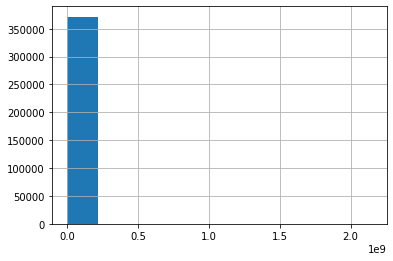

In [43]:
raw1['price'].hist()

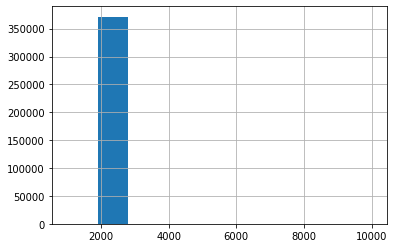

In [44]:
raw1['yearOfRegistration'].hist()

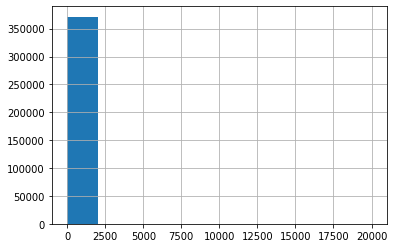

In [45]:
raw1['powerPS'].hist()

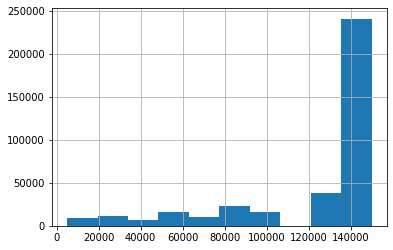

In [46]:
raw1['kilometer'].hist()

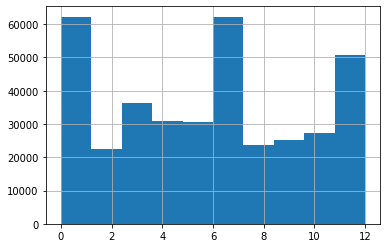

In [47]:
raw1['monthOfRegistration'].hist()

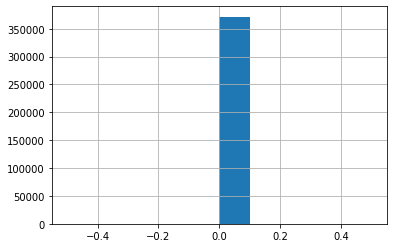

In [48]:
raw1['nrOfPictures'].hist()

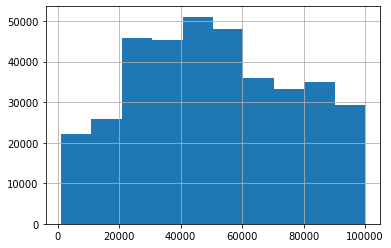

In [49]:
raw1['postalCode'].hist()

In [50]:
#Histograms are used for providing a visual display of large amounts of data that are difficult to understand in a tabular, or spreadsheet form.
#Histograms are also designed to show centering, dispersion (spread), and shape (relative frequency) of the data.

### Boxplot  

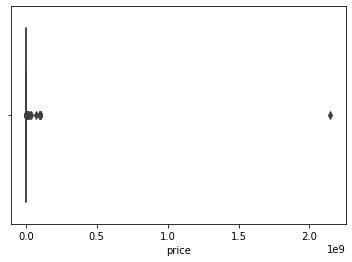

In [51]:
sns.boxplot(raw1['price'])

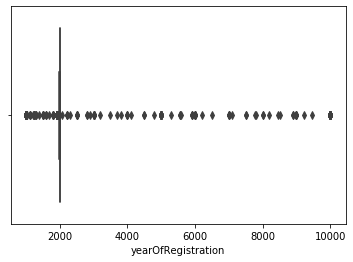

In [52]:
sns.boxplot(raw1['yearOfRegistration'])

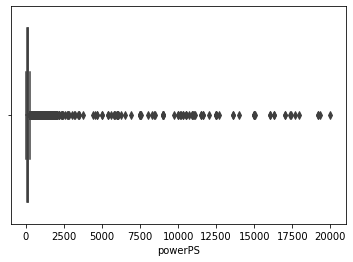

In [53]:
sns.boxplot(raw1['powerPS'])

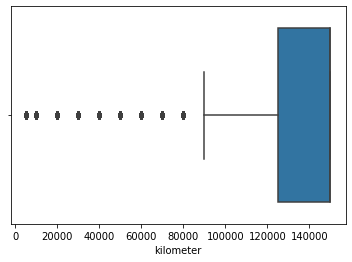

In [54]:
sns.boxplot(raw1['kilometer'])

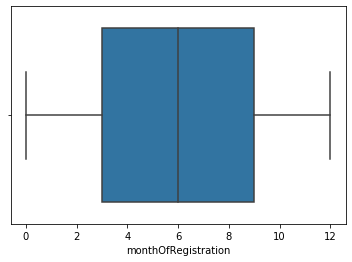

In [55]:
sns.boxplot(raw1['monthOfRegistration'])

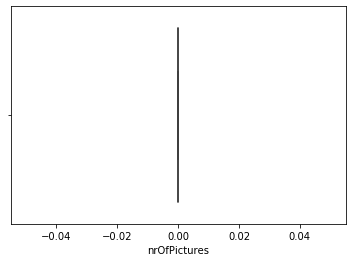

In [56]:
sns.boxplot(raw1['nrOfPictures'])

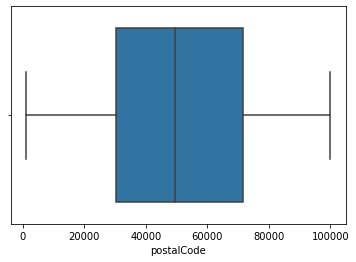

In [57]:
sns.boxplot(raw1['postalCode'])

In [58]:
#Boxplots are used to show the shape of the distribution, it's central value and its variability.
#Boxplots are also used to calculate or determine the outliers in the data.

### Outliers 

In [59]:
def outlier_detect(raw1):
    for i in raw1.describe().columns:
        Q1=raw1.describe().at['25%',i]
        Q3=raw1.describe().at['75%',i]
        IQR= Q3-Q1
        LTV = Q1-1.5*IQR
        UTV = Q3+1.5*IQR
        raw1[i]=raw1[i].mask(raw1[i]<LTV,LTV)
        raw1[i]=raw1[i].mask(raw1[i]>UTV,UTV)
    return raw1

#For detecting and removing the outliers. 

In [60]:
raw1=outlier_detect(raw1)

In [61]:
raw1

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,NaN,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,16275,test,coupe,2011.0,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,650,test,limousine,1995.0,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2200,test,cabrio,2004.0,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,0,test,limousine,1985.5,manuell,50,andere,87500,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,14500,control,bus,2014.0,manuell,125,c_max,87500,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,999,test,kleinwagen,1998.0,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


### Unique values  

In [62]:
raw1['powerPS'].nunique()
#For detecting the number of unique values.

270

In [63]:
raw1['powerPS'].unique()
#For determining the unique values in powerPS.

array([  0, 190, 163,  75,  69, 102, 109,  50, 125, 101, 105, 140, 115,
       131,  60, 136, 160, 231,  90, 118, 193,  99, 113, 218, 122, 129,
        70, 270,  95,  61, 177,  80, 170,  55, 143,  64, 232, 150, 156,
        82, 204, 155,  54, 185,  87, 180,  86,  84, 224, 235, 200, 178,
       265,  77, 110, 144, 120, 116, 184, 126,  88, 194, 197, 179, 250,
        45,  41, 165,  98, 130, 114, 211,  56, 201, 213,  58, 107,  83,
       174, 100, 220,  85,  73, 192,  68,  66,  74,  52, 147,  65,  71,
        97, 239, 203,   5, 103, 245, 258,  63,  81, 148,  44, 145, 230,
       260, 104, 188, 186, 117, 141,  59, 132, 234, 158,  39,  92,  51,
       135,  53, 209,  43, 146,  67, 106, 166,  72, 249, 237, 111,  23,
       138, 256, 175,  96, 226,  26,  37, 128, 133, 124,  33, 219, 241,
       167,  94, 182, 196, 238, 228, 112,  48, 139,  40, 240,  79, 243,
       252, 108, 121, 187, 222, 198, 233, 152, 172,  57, 137, 212,  30,
         7,  47, 173, 215, 207, 205, 171,  78,  91,  89,  76, 15

In [64]:
raw1['kilometer'].nunique()
#For detecting the number of unique values.

5

In [65]:
raw1['kilometer'].unique()
#For determining the unique values in kilometer.

array([150000, 125000,  90000,  87500, 100000], dtype=int64)

In [66]:
raw1['monthOfRegistration'].nunique()

13

In [67]:
raw1['monthOfRegistration'].unique()
#For determining the unique values in monthOfRegistration.

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9], dtype=int64)

In [68]:
raw1['yearOfRegistration'].nunique()
#For detecting the number of unique values.

36

In [69]:
raw1['yearOfRegistration'].unique()
#For determining the unique values in yearOfRegistration.

array([1993. , 2011. , 2004. , 2001. , 2008. , 1995. , 1985.5, 2014. ,
       1998. , 2005. , 2016. , 2007. , 2009. , 2002. , 2018. , 1997. ,
       1990. , 2017. , 2003. , 1994. , 1991. , 2006. , 1999. , 2012. ,
       2010. , 2000. , 1992. , 2013. , 1996. , 1989. , 2015. , 1987. ,
       1986. , 1988. , 2021.5, 2019. ])

In [70]:
raw1['nrOfPictures'].nunique()
#For detecting the number of unique values.

1

In [71]:
raw1['nrOfPictures'].unique()
#For determining the unique values in nrOfPictures.

array([0], dtype=int64)

In [72]:
raw1['postalCode'].nunique()
#For detecting the number of unique values.

8150

In [73]:
raw1['postalCode'].unique()
#For determining the unique values in postalCode.

array([70435, 66954, 90480, ..., 38528, 38325, 31096], dtype=int64)

In [74]:
raw1['price'].nunique()
#For detecting the number of unique values.

3392

In [75]:
raw1['price'].unique()
#For determining the unique values in price.

array([  480, 16275,  9800, ...,  8125, 12395, 10985], dtype=int64)

###  Import pandas profiling

In [76]:
# It generates profile reports from a pandas DataFrame
import pandas_profiling
raw1.profile_report

<bound method profile_report of         price   abtest vehicleType  yearOfRegistration    gearbox  powerPS  \
0         480     test         NaN              1993.0    manuell        0   
1       16275     test       coupe              2011.0    manuell      190   
2        9800     test         suv              2004.0  automatik      163   
3        1500     test  kleinwagen              2001.0    manuell       75   
4        3600     test  kleinwagen              2008.0    manuell       69   
5         650     test   limousine              1995.0    manuell      102   
6        2200     test      cabrio              2004.0    manuell      109   
7           0     test   limousine              1985.5    manuell       50   
8       14500  control         bus              2014.0    manuell      125   
9         999     test  kleinwagen              1998.0    manuell      101   
10       2000  control   limousine              2004.0    manuell      105   
11       2799  control       kom

#### Detecting missing values in raw1

In [77]:
raw1.isnull().sum()
#For detecting missing values

price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

#### Replacing missing values of vehicleType 

In [78]:
raw1["vehicleType"].fillna("prateek", inplace = True) 
raw1
#This replaces the missing values.
#Here the missing values are being replaced by "prateek"(We can replace the missing values by any other variable or value depending upon the necessity and objective).

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,prateek,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,16275,test,coupe,2011.0,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,650,test,limousine,1995.0,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2200,test,cabrio,2004.0,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,0,test,limousine,1985.5,manuell,50,andere,87500,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,14500,control,bus,2014.0,manuell,125,c_max,87500,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,999,test,kleinwagen,1998.0,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


#### Replacing missing values of model

In [79]:
raw1['model'].fillna('prateek', inplace = True)
raw1
#This replaces the missing values.
#Here the missing values are being replaced by "prateek"(We can replace the missing values by any other variable or value depending upon the necessity and objective).

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,prateek,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,16275,test,coupe,2011.0,manuell,190,prateek,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,650,test,limousine,1995.0,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2200,test,cabrio,2004.0,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,0,test,limousine,1985.5,manuell,50,andere,87500,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,14500,control,bus,2014.0,manuell,125,c_max,87500,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,999,test,kleinwagen,1998.0,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


#### Replacing missing values of brand 

In [80]:
raw1['brand'].fillna('prateek', inplace = True)
raw1
#This replaces the missing values.
#Here the missing values are being replaced by "prateek"(We can replace the missing values by any other variable or value depending upon the necessity and objective).

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,prateek,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,16275,test,coupe,2011.0,manuell,190,prateek,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,650,test,limousine,1995.0,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2200,test,cabrio,2004.0,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,0,test,limousine,1985.5,manuell,50,andere,87500,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,14500,control,bus,2014.0,manuell,125,c_max,87500,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,999,test,kleinwagen,1998.0,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


#### Replacing missing values of fuelType 

In [81]:
raw1['fuelType'].fillna('prateek', inplace = True)
raw1
#It replaces the missing values.
#Here the missing values are being replaced by "prateek"(We can replace the missing values by any other variable or value depending upon the necessity and objective).

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,prateek,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,16275,test,coupe,2011.0,manuell,190,prateek,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,650,test,limousine,1995.0,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2200,test,cabrio,2004.0,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,0,test,limousine,1985.5,manuell,50,andere,87500,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,14500,control,bus,2014.0,manuell,125,c_max,87500,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,999,test,kleinwagen,1998.0,manuell,101,golf,150000,0,prateek,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


#### Replacing missing values of yearOfRegistration

In [82]:
raw1['yearOfRegistration'].fillna(raw1['yearOfRegistration'].mean(), inplace = True)
raw1
#This replaces the missing values.
#Here the missing values are being replaced by the mean of that particular column.

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,prateek,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,16275,test,coupe,2011.0,manuell,190,prateek,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,650,test,limousine,1995.0,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2200,test,cabrio,2004.0,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,0,test,limousine,1985.5,manuell,50,andere,87500,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,14500,control,bus,2014.0,manuell,125,c_max,87500,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,999,test,kleinwagen,1998.0,manuell,101,golf,150000,0,prateek,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


#### Replacing missing values of powerPS

In [83]:
raw1['powerPS'].fillna(raw1['powerPS'].mean(), inplace = True)
raw1
#This replaces the missing values.
#Here the missing values are being replaced by the mean of that particular column.

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,prateek,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,16275,test,coupe,2011.0,manuell,190,prateek,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,650,test,limousine,1995.0,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2200,test,cabrio,2004.0,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,0,test,limousine,1985.5,manuell,50,andere,87500,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,14500,control,bus,2014.0,manuell,125,c_max,87500,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,999,test,kleinwagen,1998.0,manuell,101,golf,150000,0,prateek,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


#### Replacing missing values of kilometer

In [84]:
raw1['kilometer'].fillna(raw1['kilometer'].mean(), inplace = True)
raw1
#This replaces the missing values.
#Here the missing values are being replaced by the mean of that particular column.

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,prateek,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,16275,test,coupe,2011.0,manuell,190,prateek,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,650,test,limousine,1995.0,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2200,test,cabrio,2004.0,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,0,test,limousine,1985.5,manuell,50,andere,87500,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,14500,control,bus,2014.0,manuell,125,c_max,87500,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,999,test,kleinwagen,1998.0,manuell,101,golf,150000,0,prateek,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


#### Replacing missing values of monthOfRegistration 

In [85]:
raw1['monthOfRegistration'].fillna(raw1['monthOfRegistration'].mean(), inplace = True)
raw1
#This replaces the missing values.
#Here the missing values are being replaced by the mean of that particular column.

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,prateek,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,16275,test,coupe,2011.0,manuell,190,prateek,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,650,test,limousine,1995.0,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2200,test,cabrio,2004.0,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,0,test,limousine,1985.5,manuell,50,andere,87500,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,14500,control,bus,2014.0,manuell,125,c_max,87500,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,999,test,kleinwagen,1998.0,manuell,101,golf,150000,0,prateek,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


#### Replacing missing values of nrOfPictures

In [86]:
raw1['nrOfPictures'].fillna(raw1['nrOfPictures'].mean(), inplace = True)
raw1
#This replaces the missing values.
#Here the missing values are being replaced by the mean of that particular column.

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,prateek,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,16275,test,coupe,2011.0,manuell,190,prateek,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,650,test,limousine,1995.0,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2200,test,cabrio,2004.0,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,0,test,limousine,1985.5,manuell,50,andere,87500,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,14500,control,bus,2014.0,manuell,125,c_max,87500,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,999,test,kleinwagen,1998.0,manuell,101,golf,150000,0,prateek,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


#### Replacing misssing values of postalCode

In [87]:
raw1['postalCode'].fillna(raw1['postalCode'].mean(), inplace = True)
raw1
#This replaces the missing values.
#Here the missing values are being replaced by the mean of that particular column.

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,prateek,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,16275,test,coupe,2011.0,manuell,190,prateek,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,650,test,limousine,1995.0,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2200,test,cabrio,2004.0,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,0,test,limousine,1985.5,manuell,50,andere,87500,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,14500,control,bus,2014.0,manuell,125,c_max,87500,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,999,test,kleinwagen,1998.0,manuell,101,golf,150000,0,prateek,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


#### Replacing misssing values of notRepairedDamage 

In [88]:
raw1['notRepairedDamage'] = raw1['notRepairedDamage'].replace({"ja": "yes",
                                                           "nein": "no"})
#This replaces the missing values.
#Here the value "ja" is replaced by "yes" and "nein" by "no". 
#(Same as the above  i.e. any other value can be used as a replacement)

In [89]:
raw1.head(300)
#It gives the top 300 observations from the dataset.

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,prateek,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,16275,test,coupe,2011.0,manuell,190,prateek,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,650,test,limousine,1995.0,manuell,102,3er,150000,10,benzin,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2200,test,cabrio,2004.0,manuell,109,2_reihe,150000,8,benzin,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,0,test,limousine,1985.5,manuell,50,andere,87500,7,benzin,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,14500,control,bus,2014.0,manuell,125,c_max,87500,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,999,test,kleinwagen,1998.0,manuell,101,golf,150000,0,prateek,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


### Count Analysis of notRepairedDamage 

In [90]:
raw1['notRepairedDamage'].value_counts()
#Count analysis is done so as to count the specific values in the dataset.

no     263182
yes     36286
Name: notRepairedDamage, dtype: int64

In [91]:
raw1['notRepairedDamage'].fillna('nein', inplace = True)
raw1
#Replacing the missing values.

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,prateek,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,16275,test,coupe,2011.0,manuell,190,prateek,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,650,test,limousine,1995.0,manuell,102,3er,150000,10,benzin,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2200,test,cabrio,2004.0,manuell,109,2_reihe,150000,8,benzin,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,0,test,limousine,1985.5,manuell,50,andere,87500,7,benzin,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,14500,control,bus,2014.0,manuell,125,c_max,87500,8,benzin,ford,nein,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,999,test,kleinwagen,1998.0,manuell,101,golf,150000,0,prateek,volkswagen,nein,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


### Count Analysis of gearbox 

In [92]:
raw1['gearbox'].value_counts()
#Count analysis is done so as to count the specific values in the dataset.

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

In [93]:
raw1['gearbox'].fillna('manuell', inplace = True)
raw1
#Replacing the missing values.

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,prateek,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,16275,test,coupe,2011.0,manuell,190,prateek,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,650,test,limousine,1995.0,manuell,102,3er,150000,10,benzin,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2200,test,cabrio,2004.0,manuell,109,2_reihe,150000,8,benzin,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,0,test,limousine,1985.5,manuell,50,andere,87500,7,benzin,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,14500,control,bus,2014.0,manuell,125,c_max,87500,8,benzin,ford,nein,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,999,test,kleinwagen,1998.0,manuell,101,golf,150000,0,prateek,volkswagen,nein,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


### Univariate analysis

In [94]:
#Univariate analysis is needed for summarizing and finding patterns in the data.

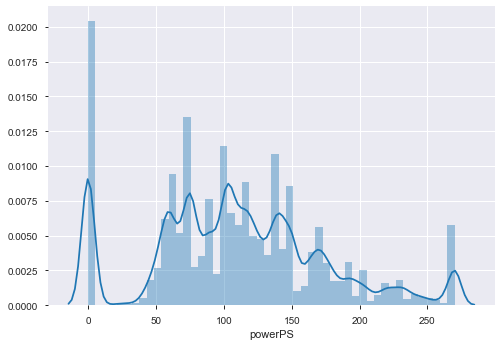

In [95]:
sns.distplot(raw1.powerPS)

#Here we determine the distplot of powerPS column.
#The distplot displays a combination of statistical representations of numerical data, such as histogram or normal curve.

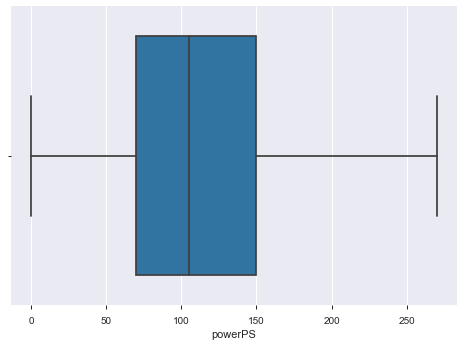

In [96]:
sns.boxplot(raw1.powerPS) 

#Here we determine the boxplot of powerPS column.
#The boxplot displayes the distribution of data and helps in detecting outliers and their values.

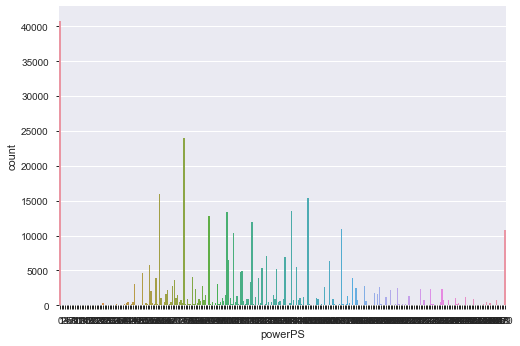

In [97]:
sns.countplot(raw1.powerPS)

#Here we determine the countplot of powerPS column.
#Countplot simply shows the number of occurrences of an item based on a certain type of category.

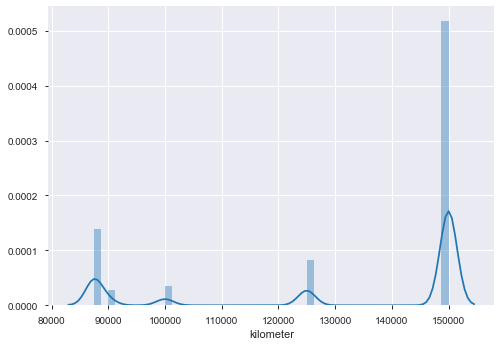

In [98]:
sns.distplot(raw1.kilometer) 

#Here we determine the distplot of the kilometer column.
#The distplot displays a combination of statistical representations of numerical data, such as histogram or normal curve.

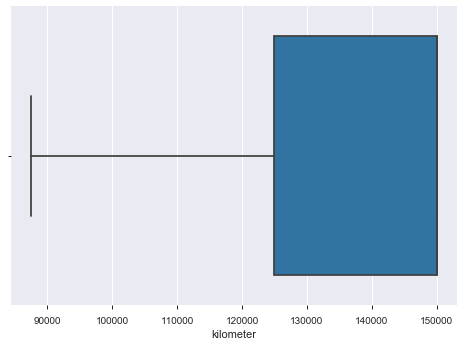

In [99]:
sns.boxplot(raw1.kilometer) 

#Here we determine the boxplot of kilometer column.
#The boxplot displayes the distribution of data and helps in detecting outliers and their values.

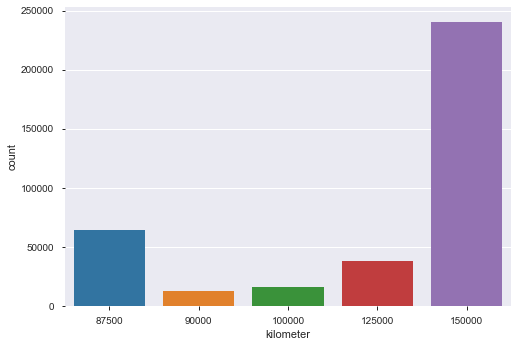

In [100]:
sns.countplot(raw1.kilometer)

#Here we determine the countplot of kilometer column.
#Countplot simply shows the number of occurrences of an item based on a certain type of category.

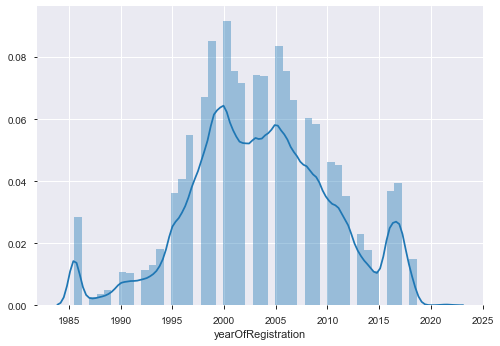

In [101]:
sns.distplot(raw1.yearOfRegistration)

#Here we determine the distplot of yearOfRegistration column.
#The distplot displays a combination of statistical representations of numerical data, such as histogram or normal curve.

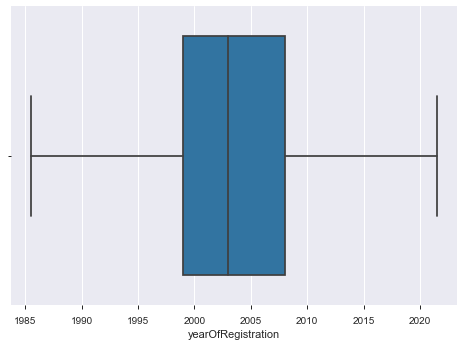

In [102]:
sns.boxplot(raw1.yearOfRegistration) 

#Here we determine the boxplot of yearOfRegistration column.
#The boxplot displayes the distribution of data and helps in detecting outliers and their values.

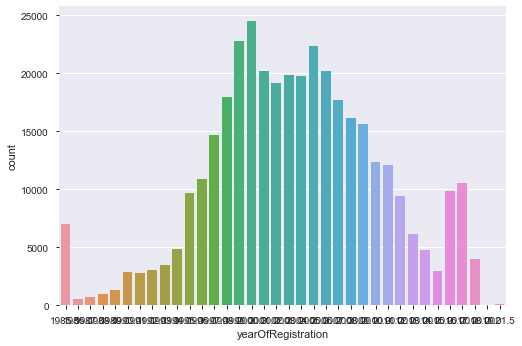

In [103]:
sns.countplot(raw1.yearOfRegistration)

#Here we determine the countplot of yearOfRegistration column.
#Countplot simply shows the number of occurrences of an item based on a certain type of category.

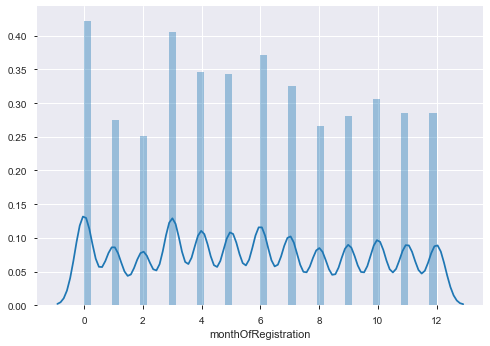

In [104]:
sns.distplot(raw1.monthOfRegistration)

#Here we determine the distplot of monthOfRegistration column.
#The distplot displays a combination of statistical representations of numerical data, such as histogram or normal curve.

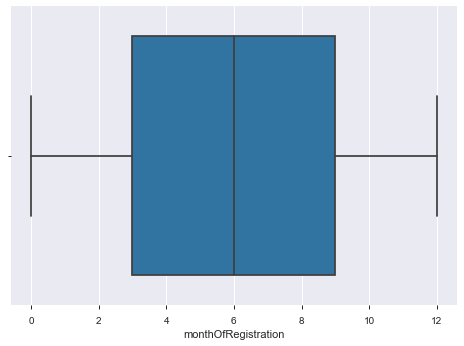

In [105]:
sns.boxplot(raw1.monthOfRegistration) 

#Here we determine the boxplot of monthOfRegistration column.
#The boxplot displayes the distribution of data and helps in detecting outliers and their values.

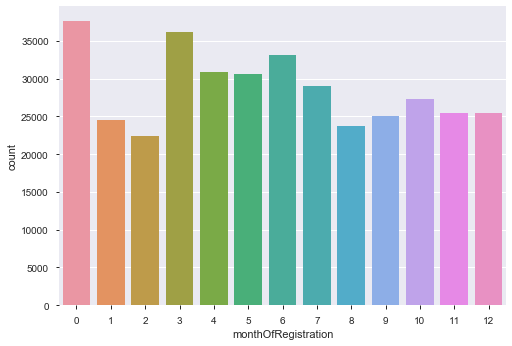

In [106]:
sns.countplot(raw1.monthOfRegistration)

#Here we determine the countplot of monthOfRegistration column.
#Countplot simply shows the number of occurrences of an item based on a certain type of category.

In [107]:
raw1.head()

#This command gives us the first few observations from the dataset.

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,prateek,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,16275,test,coupe,2011.0,manuell,190,prateek,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### Bivariate Analysis

[Text(0, 0, 'price'),
 Text(0, 0, 'abtest'),
 Text(0, 0, 'vehicleType'),
 Text(0, 0, 'yearOfRegistration'),
 Text(0, 0, 'gearbox'),
 Text(0, 0, 'powerPS'),
 Text(0, 0, 'model'),
 Text(0, 0, 'kilometer'),
 Text(0, 0, 'monthOfRegistration'),
 Text(0, 0, 'fuelType'),
 Text(0, 0, 'brand'),
 Text(0, 0, 'notRepairedDamage'),
 Text(0, 0, 'dateCreated'),
 Text(0, 0, 'nrOfPictures'),
 Text(0, 0, 'postalCode'),
 Text(0, 0, 'lastSeen')]

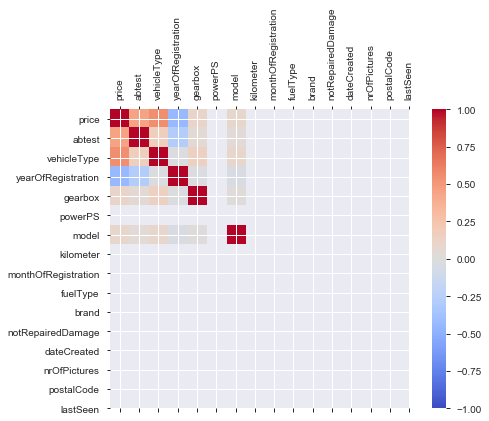

In [108]:
#It is needed for the analysis of two variables, for determining the empirical relationship between them.

corr = raw1.corr() #finding correlation between variables of raw1 dataset
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(raw1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(raw1.columns)
ax.set_yticklabels(raw1.columns)

In [109]:
top_corr_features=corr.index

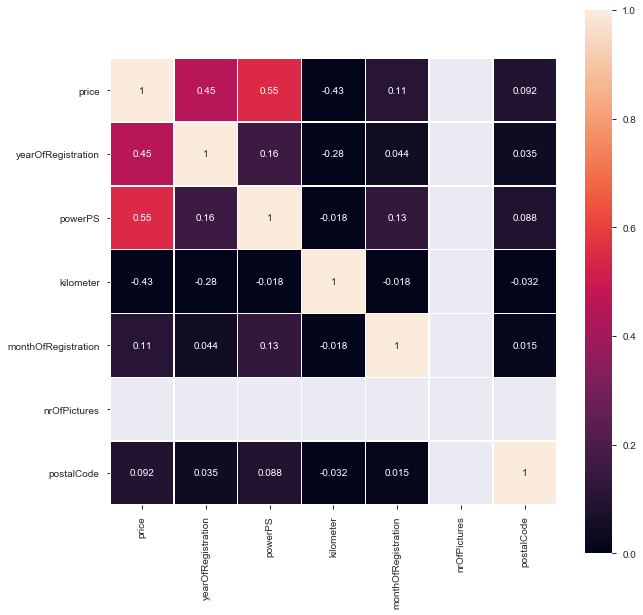

In [110]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,vmin=0,vmax=1,square=True,annot=True,linewidth=.5)

#Heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors
# Or we can also say that these Heat maps display numeric tabular data where the cells are colored depending upon the contained value. 
#Heat maps are great for making trends in this kind of data more readily apparent, particularly when the data is ordered and there is clustering.

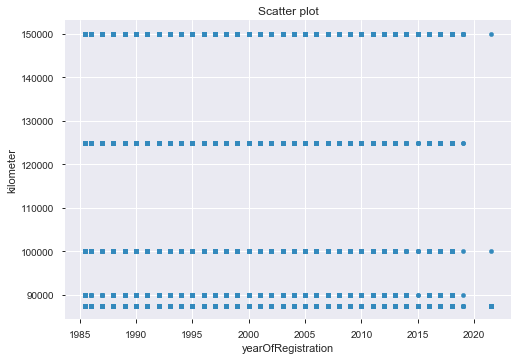

In [111]:
raw1.plot.scatter(x='yearOfRegistration',y='kilometer')
plt.title('Scatter plot')
plt.xlabel('yearOfRegistration')
plt.ylabel('kilometer')
plt.show()

#Scatter plots are usually used to observe and show relationships between two numerical variables i.e. identifying the correlation between two numerical variables.

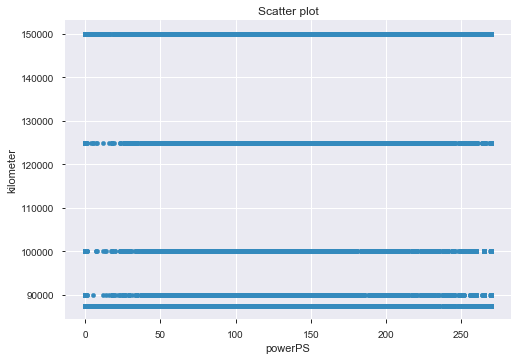

In [112]:
raw1.plot.scatter(x='powerPS',y='kilometer')
plt.title('Scatter plot')
plt.xlabel('powerPS')
plt.ylabel('kilometer')
plt.show()

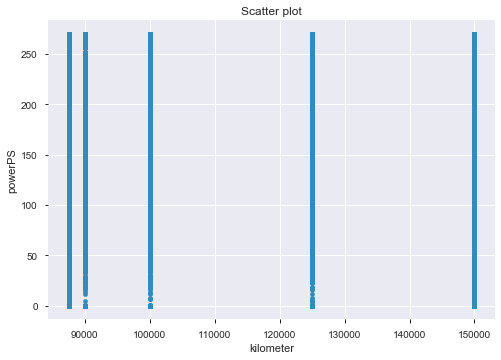

In [113]:
raw1.plot.scatter(x='kilometer',y='powerPS')
plt.title('Scatter plot')
plt.xlabel('kilometer')
plt.ylabel('powerPS')
plt.show()

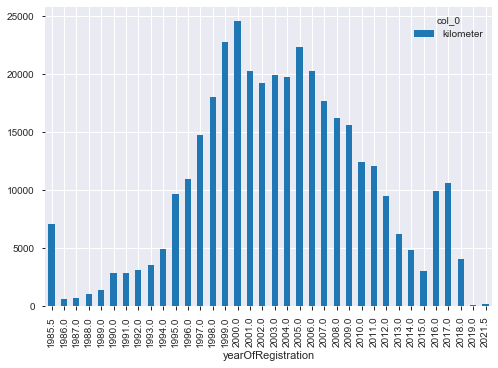

In [114]:
my_tab1 = pd.crosstab(index = raw1["yearOfRegistration"], 
                              columns="kilometer")     

my_tab1.plot.bar()




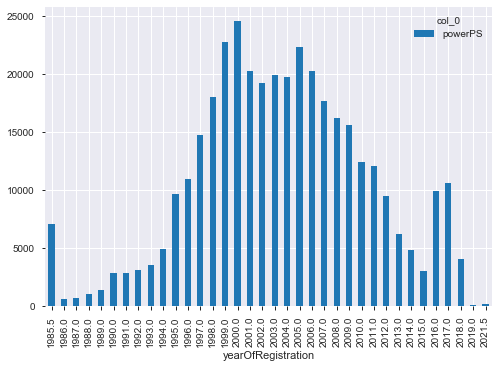

In [115]:
my_tab2 = pd.crosstab(index = raw1["yearOfRegistration"], 
                              columns="powerPS")     

my_tab2.plot.bar()


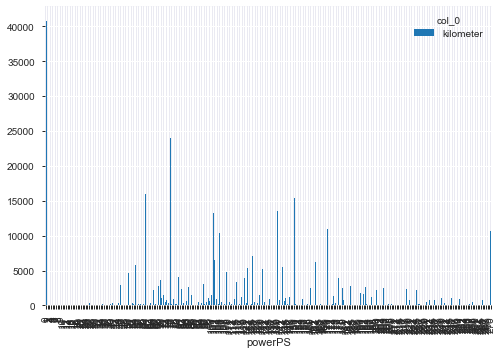

In [116]:
my_tab3 = pd.crosstab(index = raw1["powerPS"], 
                              columns="kilometer")     

my_tab3.plot.bar()


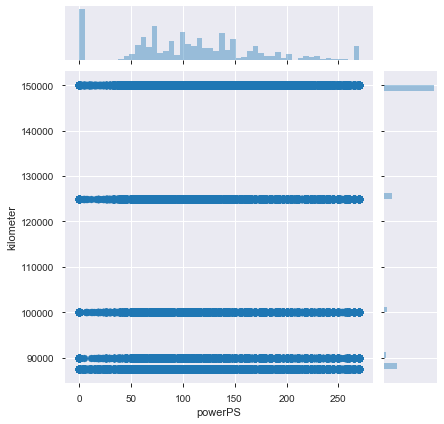

In [117]:
sns.jointplot('powerPS','kilometer', data=raw1, kind='scatter')

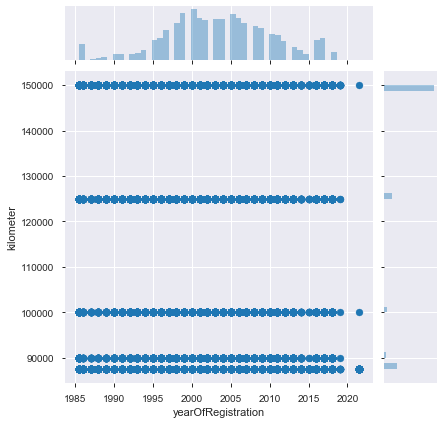

In [118]:
sns.jointplot('yearOfRegistration','kilometer', data=raw1, kind='scatter')

### Difference of date & time

In [119]:
#These are needed to calculate the date & time difference between two columns as given in our objective.
import datetime
import time
from datetime import date
from datetime import timedelta

In [120]:
datetimeFormat = '%Y-%m-%d %H:%M:%S.%f'
#date1 = raw1['lastSeen']
#date2 = raw1['dateCreated']
#diff = datetime.date1-datetime.date2

In [121]:
d1 = pd.to_datetime(raw1['lastSeen'],format = datetimeFormat)

In [122]:
d2 = pd.to_datetime(raw1['dateCreated'],format = datetimeFormat)

In [123]:
(d1-d2)

0        14 days 03:16:57
1        14 days 01:46:50
2        22 days 12:47:46
3         0 days 17:40:17
4         6 days 10:17:21
5         2 days 19:17:07
6         4 days 18:18:39
7         4 days 16:47:58
8         0 days 23:42:13
9        14 days 17:17:06
10       11 days 10:45:34
11        0 days 10:25:17
12       17 days 13:16:16
13        2 days 02:50:54
14       16 days 07:45:42
15        8 days 08:46:47
16        0 days 12:46:46
17       17 days 13:16:07
18       13 days 18:45:11
19        4 days 22:46:05
20        4 days 16:45:49
21       11 days 06:44:26
22        8 days 01:16:33
23        9 days 01:46:11
24        0 days 20:40:49
25        0 days 21:44:09
26        6 days 09:16:46
27       19 days 09:44:53
28        1 days 07:44:33
29        1 days 11:45:28
               ...       
371498    6 days 12:44:29
371499    5 days 00:16:40
371500   17 days 04:17:32
371501   11 days 09:16:04
371502    6 days 09:44:29
371503    7 days 04:16:26
371504    1 days 21:28:38
371505    2 

In [124]:
(d1-d2).dt.days

0         14
1         14
2         22
3          0
4          6
5          2
6          4
7          4
8          0
9         14
10        11
11         0
12        17
13         2
14        16
15         8
16         0
17        17
18        13
19         4
20         4
21        11
22         8
23         9
24         0
25         0
26         6
27        19
28         1
29         1
          ..
371498     6
371499     5
371500    17
371501    11
371502     6
371503     7
371504     1
371505     2
371506    18
371507     2
371508     4
371509     1
371510     7
371511     6
371512    13
371513    16
371514     2
371515    26
371516     2
371517     5
371518     4
371519     4
371520     0
371521     2
371522     0
371523    23
371524     6
371525    19
371526     4
371527    15
Length: 371528, dtype: int64

In [125]:
raw1['kilometer']

0         150000
1         125000
2         125000
3         150000
4          90000
5         150000
6         150000
7          87500
8          87500
9         150000
10        150000
11        150000
12        150000
13        150000
14         87500
15         87500
16        150000
17        150000
18        150000
19        150000
20        100000
21        150000
22        150000
23        150000
24        150000
25        150000
26        125000
27         87500
28         87500
29        150000
           ...  
371498    150000
371499    150000
371500     87500
371501    150000
371502    150000
371503     87500
371504    150000
371505    150000
371506    150000
371507    150000
371508    150000
371509    150000
371510    150000
371511    150000
371512    150000
371513    150000
371514    150000
371515    150000
371516    150000
371517    150000
371518    150000
371519    150000
371520    150000
371521    150000
371522    150000
371523     87500
371524    125000
371525    1500

### Dividing data using Crosstab table.

In [126]:
# The crosstab is needed to build a cross-tabulation table and plot.
# It by default computes a frequency table of the factors unless an array of values and an aggregation function are passed.
# The Crossstab table can come in handy sometimes as sometimes it can be tough to remember all the steps to make this happen on your own. The simple crosstab is the quickest route to the solution and provides some useful shortcuts for certain types of analysis.

In [127]:
pd.crosstab(raw1['yearOfRegistration'],raw1['powerPS'])

powerPS,0,1,2,3,4,5,6,7,8,9,...,260,261,262,264,265,266,267,268,269,270
yearOfRegistration,,,,,,,,,,,,,,,,,,,,,
1985.5,2038,4,1,1,0,1,1,0,1,2,...,8,1,1,2,5,0,0,2,2,215
1986.0,102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
1987.0,101,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,16
1988.0,118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
1989.0,173,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
1990.0,820,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,28
1991.0,322,0,0,3,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,64
1992.0,317,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,80
1993.0,392,0,0,0,3,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,81


In [128]:
pd.crosstab(raw1['yearOfRegistration'],raw1['kilometer'])

kilometer,87500,90000,100000,125000,150000
yearOfRegistration,,,,,
1985.5,2884,341,743,593,2470
1986.0,147,17,37,44,331
1987.0,129,17,24,53,474
1988.0,152,32,37,91,653
1989.0,233,34,46,103,926
1990.0,528,62,107,176,1979
1991.0,257,71,103,227,2152
1992.0,262,63,107,244,2372
1993.0,262,82,99,300,2726


In [129]:
pd.crosstab(raw1['kilometer'],raw1['powerPS'])

powerPS,0,1,2,3,4,5,6,7,8,9,...,260,261,262,264,265,266,267,268,269,270
kilometer,,,,,,,,,,,,,,,,,,,,,
87500,6626,12,5,8,26,91,8,6,3,4,...,52,0,8,30,255,3,1,7,0,3004
90000,874,2,0,0,0,1,0,0,0,0,...,23,0,0,2,43,0,0,0,1,488
100000,1536,3,0,0,0,0,0,2,1,0,...,27,0,0,0,51,0,0,0,1,640
125000,3130,2,0,0,1,2,0,1,1,0,...,48,1,0,3,104,2,1,0,1,1113
150000,28654,15,5,1,3,9,3,2,2,1,...,109,4,7,10,270,7,1,10,10,5490


In [130]:
pd.crosstab(raw1['yearOfRegistration'],raw1['monthOfRegistration'])

monthOfRegistration,0,1,2,3,4,5,6,7,8,9,10,11,12
yearOfRegistration,,,,,,,,,,,,,
1985.5,1554,645,378,626,504,495,585,914,287,330,275,225,213
1986.0,84,45,29,56,47,38,50,56,29,33,34,30,45
1987.0,102,40,30,40,70,52,70,72,34,46,46,42,53
1988.0,136,58,45,102,79,88,99,84,59,49,50,64,52
1989.0,215,79,54,132,126,114,123,110,69,83,77,78,82
1990.0,933,178,128,218,184,169,167,164,129,133,160,160,129
1991.0,406,219,169,279,237,262,289,318,112,120,141,143,115
1992.0,413,197,191,304,288,219,268,252,182,147,171,180,236
1993.0,562,217,169,403,360,257,279,249,181,194,204,188,206


### Standard Scaler

In [131]:
#Standard Scaler is used for the transformation of the data.
#The basic idea behind StandardScaler is that it will transform the data such that its distribution will have a mean value 0 and standard deviation of 1.


In [132]:
##Standard Scaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
kilm= np.array(raw1['kilometer'])
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(kilm.reshape(-1,1))

#Here we are applying standard scaler in the kilometer column.

In [133]:
scaled_data1

array([[ 0.68213096],
       [-0.29067691],
       [-0.29067691],
       ...,
       [ 0.68213096],
       [ 0.68213096],
       [-1.74988873]])

In [134]:
##Standard Scaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
powrr= np.array(raw1['powerPS'])
scaler = StandardScaler()
scaled_data2 = scaler.fit_transform(powrr.reshape(-1,1))

#Here we are applying standard scaler in the powerPS column.

In [135]:
scaled_data2

array([[-1.71293046],
       [ 1.23768981],
       [ 0.81839114],
       ...,
       [-0.12891327],
       [-0.15997243],
       [ 2.48005624]])

In [136]:
##Standard Scaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
yr= np.array(raw1['yearOfRegistration'])
scaler = StandardScaler()
scaled_data3 = scaler.fit_transform(yr.reshape(-1,1))

#Here we are applying standard scaler in the yearOfRegistration column.

In [137]:
scaled_data3

array([[-1.53285444],
       [ 1.07829257],
       [ 0.06284651],
       ...,
       [-1.09766327],
       [-0.22728093],
       [ 1.36842002]])

In [138]:
##Standard Scaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
mon= np.array(raw1['monthOfRegistration'])
scaler = StandardScaler()
scaled_data4 = scaler.fit_transform(mon.reshape(-1,1))

#Here we are applying standard scaler in the monthOfRegistration column.

In [139]:
scaled_data4

array([[-1.54467029],
       [-0.19783533],
       [ 0.61026565],
       ...,
       [-0.73656931],
       [ 0.07153167],
       [ 0.61026565]])

### MinMaxScaler

In [140]:
# MinMAx Scaler helps in transforming features by scaling each feature to a given range. 
#It scales and transforms each feature individually such that it is in the given range on the training set, i.e. between zero and one.

In [141]:
#Applying minmaxscaler on the powerPS column.
from sklearn.preprocessing import MinMaxScaler
powr= np.array(raw1['powerPS'])
scaler = StandardScaler()
scaled_data5 = scaler.fit_transform(powr.reshape(-1,1))

In [142]:
scaled_data5

array([[-1.71293046],
       [ 1.23768981],
       [ 0.81839114],
       ...,
       [-0.12891327],
       [-0.15997243],
       [ 2.48005624]])

In [143]:
#Applying minmax scaler on the kilometer column.

from sklearn.preprocessing import MinMaxScaler
kilmm= np.array(raw1['kilometer'])
scaler = StandardScaler()
scaled_data7 = scaler.fit_transform(kilmm.reshape(-1,1))

In [144]:
scaled_data7

array([[ 0.68213096],
       [-0.29067691],
       [-0.29067691],
       ...,
       [ 0.68213096],
       [ 0.68213096],
       [-1.74988873]])

In [145]:
#Applying minmax scaler on the yearOfRegistration column.

from sklearn.preprocessing import MinMaxScaler
yrr= np.array(raw1['yearOfRegistration'])
scaler = StandardScaler()
scaled_data8 = scaler.fit_transform(yrr.reshape(-1,1))

In [146]:
scaled_data8

array([[-1.53285444],
       [ 1.07829257],
       [ 0.06284651],
       ...,
       [-1.09766327],
       [-0.22728093],
       [ 1.36842002]])

In [147]:
#Applying minmax scaler on the monthOfRegistration column.

from sklearn.preprocessing import MinMaxScaler
month= np.array(raw1['monthOfRegistration'])
scaler = StandardScaler()
scaled_data9 = scaler.fit_transform(month.reshape(-1,1))

In [148]:
scaled_data9

array([[-1.54467029],
       [-0.19783533],
       [ 0.61026565],
       ...,
       [-0.73656931],
       [ 0.07153167],
       [ 0.61026565]])

### Dividing the data

In [149]:
#Dividing the data by vehicleType column as given in our objective.
list(raw1['vehicleType'].unique())

['prateek',
 'coupe',
 'suv',
 'kleinwagen',
 'limousine',
 'cabrio',
 'bus',
 'kombi',
 'andere']

In [150]:
raw1['vehicleType'].nunique()

9

In [151]:
raw2=raw1

In [152]:
raw2

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,480,test,prateek,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,16275,test,coupe,2011.0,manuell,190,prateek,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,9800,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,1500,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,3600,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,650,test,limousine,1995.0,manuell,102,3er,150000,10,benzin,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2200,test,cabrio,2004.0,manuell,109,2_reihe,150000,8,benzin,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,0,test,limousine,1985.5,manuell,50,andere,87500,7,benzin,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,14500,control,bus,2014.0,manuell,125,c_max,87500,8,benzin,ford,nein,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,999,test,kleinwagen,1998.0,manuell,101,golf,150000,0,prateek,volkswagen,nein,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


#### Removing unnecessary columns

In [153]:
#Removing those columns which are not necessary in our analysis.

car = raw2.drop(columns=['price','abtest','vehicleType','yearOfRegistration','powerPS','model','kilometer','monthOfRegistration','brand','dateCreated','nrOfPictures','postalCode','lastSeen'])

In [154]:
car

,gearbox,fuelType,notRepairedDamage
0,manuell,benzin,nein
1,manuell,diesel,yes
2,automatik,diesel,nein
3,manuell,benzin,no
4,manuell,diesel,no
5,manuell,benzin,yes
6,manuell,benzin,no
7,manuell,benzin,no
8,manuell,benzin,nein
9,manuell,prateek,nein


#### Getting the dummy values

In [155]:
#It is needed to create dummy variables for the categorical variables.
car1 = pd.get_dummies(car)

In [156]:
car1.head()

#This gives the first few observations of the dataset.

,gearbox_automatik,gearbox_manuell,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg,fuelType_prateek,notRepairedDamage_nein,notRepairedDamage_no,notRepairedDamage_yes
0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,1,0,0
3,0,1,0,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,0,1,0


In [157]:
car1

,gearbox_automatik,gearbox_manuell,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg,fuelType_prateek,notRepairedDamage_nein,notRepairedDamage_no,notRepairedDamage_yes
0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,1,0,0
3,0,1,0,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,0,1,0
5,0,1,0,1,0,0,0,0,0,0,0,0,1
6,0,1,0,1,0,0,0,0,0,0,0,1,0
7,0,1,0,1,0,0,0,0,0,0,0,1,0
8,0,1,0,1,0,0,0,0,0,0,1,0,0
9,0,1,0,0,0,0,0,0,0,1,1,0,0


In [158]:
car2=raw2[['powerPS','kilometer']]
y=raw2['price']

In [159]:
car2

,powerPS,kilometer
0,0,150000
1,190,125000
2,163,125000
3,75,150000
4,69,90000
5,102,150000
6,109,150000
7,50,87500
8,125,87500
9,101,150000


In [160]:
y

0           480
1         16275
2          9800
3          1500
4          3600
5           650
6          2200
7             0
8         14500
9           999
10         2000
11         2799
12          999
13         2500
14        16275
15          450
16          300
17         1750
18         7550
19         1850
20        10400
21         3699
22         2900
23          450
24          500
25         2500
26         5555
27         6900
28         1990
29          690
          ...  
371498      699
371499      600
371500    16275
371501     3900
371502     1600
371503     1700
371504     2600
371505      800
371506     5900
371507     5999
371508     1400
371509     1900
371510     6500
371511     1999
371512     5000
371513     4400
371514      999
371515     1690
371516     1490
371517     7900
371518     3999
371519     5250
371520     3200
371521     1150
371522        0
371523     2200
371524     1199
371525     9200
371526     3400
371527    16275
Name: price, Length: 371

In [161]:
y.isnull().sum()

0

In [162]:
x=pd.concat([car2,car1],axis=1)

In [163]:
x

,powerPS,kilometer,gearbox_automatik,gearbox_manuell,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg,fuelType_prateek,notRepairedDamage_nein,notRepairedDamage_no,notRepairedDamage_yes
0,0,150000,0,1,0,1,0,0,0,0,0,0,1,0,0
1,190,125000,0,1,0,0,0,1,0,0,0,0,0,0,1
2,163,125000,1,0,0,0,0,1,0,0,0,0,1,0,0
3,75,150000,0,1,0,1,0,0,0,0,0,0,0,1,0
4,69,90000,0,1,0,0,0,1,0,0,0,0,0,1,0
5,102,150000,0,1,0,1,0,0,0,0,0,0,0,0,1
6,109,150000,0,1,0,1,0,0,0,0,0,0,0,1,0
7,50,87500,0,1,0,1,0,0,0,0,0,0,0,1,0
8,125,87500,0,1,0,1,0,0,0,0,0,0,1,0,0
9,101,150000,0,1,0,0,0,0,0,0,0,1,1,0,0


#### Dividing the data into training and testing on i/p & o/p variables with 0.25(25%) test size

In [164]:
#Dividing the data into training and testing avoids overfitting and underfitting.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)


#### Applying Linear Regression

In [165]:
model=LinearRegression()

In [166]:
#Now we are fitting the model into the train and test data.
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
#Predicting values of test data.
q=model.predict(x_test)

In [168]:
#Calculating accuracy.
model.score(x_test,y_test)

0.5622585403575273

In [169]:
#The accuracy obtained by linear regression is 56.22%.

In [170]:
#R-squared explains to what extent the variance of one variable explains the variance of the second variable.
#Higher the r2 value better the model

#Therefore importing r2_score package from sklearn.metrics
from sklearn.metrics import r2_score
r2_score(q,y_test)

0.2195352760396968

### Regressors
##### Applying Random Forest Regressor

In [171]:
#Random forest regressor helps to fit a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
from sklearn.ensemble import RandomForestRegressor

In [172]:
#Creating regressor object
regressor = RandomForestRegressor(max_depth=5,n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [173]:
s= regressor.predict(x_test)

In [174]:
regressor.score(x_test,y_test)

0.628389062132123

In [175]:
#The accuracy obtained by randomforest regressor is 62.83%

In [176]:
#R-squared explains to what extent the variance of one variable explains the variance of the second variable.
#Higher the r2 value better the model
r2_score(s,y_test)

0.397717969602293

#### Applying Decision Tree Regressor

In [177]:
#Decision Tree uses Mean square error instead of cross entropy to determine splits which helps in getting better accuracy.
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor(max_depth=5,random_state = 0)
regressor1.fit(x_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [178]:
a=regressor1.predict(x_test)

In [179]:
regressor1.score(x_test,y_test)

0.621260196345255

In [180]:
#The accuracy obtained by Decisiontree regressor is 62.12%

In [181]:
#R-squared explains to what extent the variance of one variable explains the variance of the second variable.
#Higher the r2 value better the model
r2_score(a,y_test)

0.3907844674428044

#### Elastic Net Regressor

In [182]:
#Elastic Net incorporates penalties from both L1 & L2 regularization which will shrink some coefficients and set some to 0 for sparse selection.
from sklearn.linear_model import ElasticNet


Elreg = ElasticNet(random_state=0)
        
Elreg.fit(x_train,y_train)



ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [183]:
d = Elreg.predict(x_test)

In [184]:
d

array([10989.70147148,  5434.97312229,  5816.1523878 , ...,
        4765.96779547,  5884.71683117, 11706.85812195])

In [185]:
Elreg.score(x_test,y_test)

0.5295057076536924

In [186]:
#The accuracy obtained by Elasticnet regressor is 52.95%

In [187]:
#R-squared explains to what extent the variance of one variable explains the variance of the second variable.
#Higher the r2 value better the model
r2_score(d,y_test)

0.036467399671904044

#### Lasso Regressor

In [188]:
#Lasso uses the L1 penalty term. 
#It eliminate some features entirely and give us a subset of predictors that helps mitigate multi-collinearity and model complexity.
#It also allows for feature selection.
from sklearn.linear_model import Lasso

las = Lasso(alpha=0.1, normalize=True)

las.fit(x_train,y_train)



Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [189]:
f = las.predict(x_test)

In [190]:
las.score(x_test,y_test)

0.5613353937002401

In [191]:
##The accuracy obtained by Lasso regressor is 56.13%

In [192]:
#R-squared explains to what extent the variance of one variable explains the variance of the second variable.
#Higher the r2 value better the model
r2_score(f,y_test)

0.17513111358424704

#### Ridge Regressor

In [193]:
#Ridge uses L2 regularization which decreases the complexity of the model 
from sklearn.linear_model import Ridge

rid = Ridge(alpha=0.5, normalize=True)

rid.fit(x_train,y_train)



Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [194]:
g = rid.predict(x_test)


In [195]:
rid.score(x_test,y_test)

0.5187386390046054

In [196]:
##The accuracy obtained by ridge regressor is 51.87%

In [197]:
#R-squared explains to what extent the variance of one variable explains the variance of the second variable.
#Higher the r2 value better the model
r2_score(g,y_test)

-0.5122357289734905

#### SGD or Stochastic Gradient Descent Regressor

In [198]:
#SGD estimates the gradient of the loss of  each sample at a time and the model is updated along the way with a decreasing strength schedule or learning rate.
#It works with data represented as dense numpy arrays of floating point values for the features.
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [199]:
h = sgd.predict(x_test)

In [200]:
sgd.score(x_test,y_test)

-5.857099187624218e+27

In [201]:
#The accuracy obtained by SGD regressor is -5.85% i.e. -ve accuracy, which is not possible.

In [202]:
#R-squared explains to what extent the variance of one variable explains the variance of the second variable.
#Higher the r2 value better the model
r2_score(h,y_test)

-26.414593578791475

## Conclusion :

In [ ]:
I have tried to explore and use as much stuff as I could with this dataset in order to understand the very basic topics about:

1) Data interpretation.  
2) Data selection.
3) Feature selection.
4) Featurelabeling.
5) Data visualization.
6) Various ML algorithms application.

In [ ]:
And by looking at the final result my observation is that the most accurate algorithm for price prediction is Random Forest Algorithm which gave approx 63% of accuracy closely followed by Decison Tree Algorithm standing at approx 62% accuracy.
Therefore Random forest is the best fit algorithm to our model.

In [ ]:
Any comments, suggestions are welcome.